# Imports 

## general 

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

## PyalData

In [2]:
from pyaldata import *

# Load data

In [3]:
# TODO: add example data to the repo and run on that
data_dir = "/Users/bagibence/Box Sync/Imperial/data/"
fname = os.path.join(data_dir, "Chewie_CO_CS_2016-10-21.mat")

In [4]:
# load TrialData .mat file into a DataFrame
df = mat2dataframe(fname, shift_idx_fields=True)

Each trial is a row in the dataframe

By using `pandas` we get a lot of functionality for free.

In [5]:
df.head()

,monkey,date,task,target_direction,trial_id,result,bin_size,perturbation,perturbation_info,epoch,...,idx_peak_speed,idx_trial_end,pos,vel,acc,force,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,Chewie,10-21-2016,CO,0.785398,1,R,0.01,CS,-0.52,BL,...,369,446,"[[5.778064202616431, -35.397015549165786], [5....","[[-0.7793813732066821, 4.136785603960551], [-1...","[[-51.969786428074926, 14.202847093285325], [-...","[[0.12316992347195488, 0.2506054987408934], [0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
1,Chewie,10-21-2016,CO,1.570796,2,R,0.01,CS,-0.52,BL,...,312,374,"[[5.749738457404149, -24.643406091404042], [5....","[[1.9163909188240478, -2.763349295373866], [1....","[[-36.779409320972285, 1.7821809867372298], [-...","[[0.3685575721810173, 0.17911060954700603], [0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
2,Chewie,10-21-2016,CO,-1.570796,3,R,0.01,CS,-0.52,BL,...,341,405,"[[-0.08846028882207335, -21.796383214740942], ...","[[0.6600912719115256, -4.014682191879345], [0....","[[15.812499710917256, 16.621785484272777], [10...","[[0.3523246575179767, -0.09122904723894733], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
3,Chewie,10-21-2016,CO,3.141593,4,R,0.01,CS,-0.52,BL,...,269,326,"[[0.2044172614704891, -37.980265533779594], [0...","[[4.529933995107801, 4.629844429981232], [4.06...","[[-39.8450200830264, 25.037788333969146], [-48...","[[0.16886748091580156, 0.07539164418520175], [...","[[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."
4,Chewie,10-21-2016,CO,-2.356194,5,R,0.01,CS,-0.52,BL,...,347,414,"[[-8.487759048702024, -29.610739441410566], [-...","[[3.3872550577518203, -0.3581721292107508], [4...","[[88.37767895758228, -30.26694467609077], [95....","[[0.5500420770141063, -0.39266117674997386], [...","[[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [3, 1], [5, 1], [5, 2], [7, 1...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [1, 3], [4, 1], [4, 2], [5, 1..."


# Preprocess 

## combine time-bins into longer ones

Every function that returns a trial_data dataframe works on and returns a copy, so the original dataframe is not changed.

In [6]:
td = combine_time_bins(df, 2)

print(df.head().bin_size)
print()
print(td.head().bin_size)

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
Name: bin_size, dtype: float64

0    0.02
1    0.02
2    0.02
3    0.02
4    0.02
Name: bin_size, dtype: float64


Time-varying signals have new time coordinates

In [7]:
print("original: ", df.M1_spikes[0].shape)
print("combined: ", td.M1_spikes[0].shape)

original:  (457, 84)
combined:  (228, 84)


## Remove low-firing neurons 

In [8]:
td = remove_low_firing_neurons(td, "M1_spikes",  5)
td = remove_low_firing_neurons(td, "PMd_spikes", 5)

print("original: ", df.M1_spikes[0].shape)
print("removed:  ", td.M1_spikes[0].shape)

original:  (457, 84)
removed:   (228, 63)


/Users/bagibence/Box Sync/Imperial/PyalData/pyaldata/tools.py:738: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
/Users/bagibence/Box Sync/Imperial/PyalData/pyaldata/tools.py:738: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


## Transform signals

In [9]:
td = transform_signal(td, "M1_spikes",  'sqrt')
td = transform_signal(td, "PMd_spikes", 'sqrt')

# alternatively
# td = sqrt_transform_signal(td, "M1_spikes", "sqrt")

td.M1_spikes[0]

array([[0.        , 0.        , 0.        , ..., 1.41421356, 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.41421356, 1.        ,
        0.        ]])

For other transforms see the docstring of `transform_signal` (and the code).

## Merge signals from multiple areas 

In [10]:
td = merge_signals(td, ["M1_spikes", "PMd_spikes"], "both_spikes")

print(f"Merging M1 and PMd gives {td.M1_spikes[0].shape[1]} + {td.PMd_spikes[0].shape[1]} = {td.both_spikes[0].shape[1]} neurons")

Merging M1 and PMd gives 63 + 109 = 172 neurons


## Calculate firing rates from spikes 

In [11]:
# works on "_spikes" fields and automatically divides by bin_size
td = add_firing_rates(td, 'smooth')

For other fields use `smooth_signals`

Internally we use `numpy` arrays for generality but working with `xarray` can save you a lot of headaches and thinking.

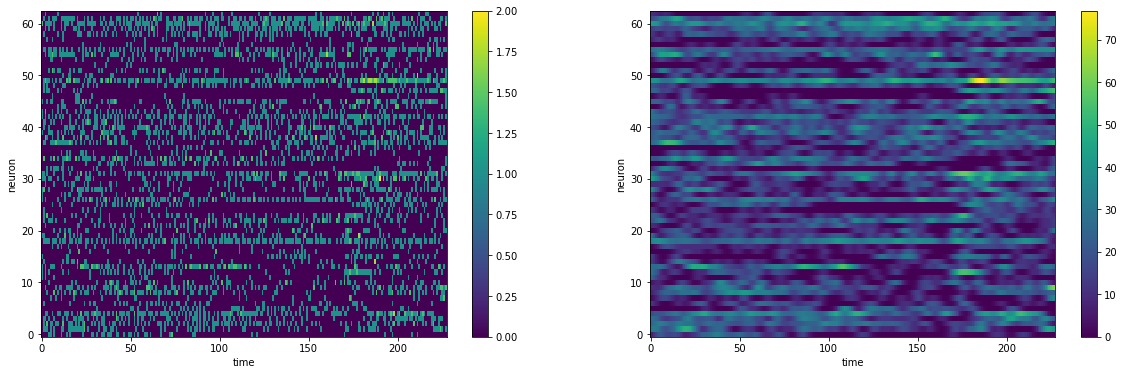

In [12]:
fig, ax = plt.subplots(figsize = (20, 6), ncols = 2)

xr.DataArray(td.M1_spikes[0], dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[0])
xr.DataArray(td.M1_rates[0],  dims = ['time', 'neuron']).transpose('neuron', 'time').plot(ax=ax[1])

## Keep only the successful trials

In [13]:
print("all trials:", td.shape[0])

td = select_trials(td, "result == 'R'")

print("successful trials:", td.shape[0])

all trials: 293
successful trials: 286


## Restrict time to an interval

In [14]:
move_td = restrict_to_interval(td, "idx_movement_on", end_point_name=None, rel_start=0, rel_end=40)

print("first trial's length in full:", td.both_rates[0].shape)
print("first trial's length in the new dataframe:", move_td.both_rates[0].shape)

first trial's length in full: (228, 172)
first trial's length in the new dataframe: (41, 172)


# Dimensionality reduction

## Further preprocess by subtracting cross-condition mean 

In [15]:
# aka center per time point
move_td = subtract_cross_condition_mean(move_td)

## Apply PCA and FA 

In [16]:
from sklearn.decomposition import PCA, FactorAnalysis

In [17]:
pca_dims = 30
fa_dims = 2

move_td = dim_reduce(move_td, PCA(pca_dims), "both_rates", "both_pca")
move_td = dim_reduce(move_td, FactorAnalysis(fa_dims), "both_rates", "both_fa")

In [18]:
print(f"Reduced from {move_td['both_rates'][0].shape[1]} dimensions to {move_td['both_pca'][0].shape[1]}")

Reduced from 172 dimensions to 30


## Calculate target ID from target direction

In [19]:
def get_target_id(trial):
    return int(np.round((trial.target_direction + np.pi) / (0.25*np.pi))) - 1

# using pandas apply
move_td["target_id"] = move_td.apply(get_target_id, axis=1)

# using a list comprehension
#move_td["target_id"] = [get_target_id(trial) for (i, trial) in df.iterrows()]

## Trial averaging 

### Group by `target_id` and average

In [20]:
av_per_dir = trial_average(move_td, "target_id")

/Users/bagibence/Box Sync/Imperial/PyalData/pyaldata/tools.py:659: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  av_df = trial_data.mean()


In [21]:
av_per_dir

,target_direction,bin_size,perturbation_info,idx_trial_start,idx_target_on,idx_go_cue,idx_movement_on,idx_peak_speed,idx_trial_end,target_id,...,PMd_rates,both_rates,both_pca,both_fa,monkey,date,task,result,perturbation,epoch
0,-2.356194,0.02,-0.52,NaN,NaN,NaN,0.0,8.394737,39.064516,0.0,...,"[[-1.9331131, -1.2877556, 3.469638, 0.86549777...","[[-1.3696721, -8.17678, -1.8215902, 7.19406, 1...","[[-32.922714, -24.742195, 47.323624, 24.066544...","[[-0.9041335476682101, 1.1857762358102781], [-...",Chewie,10-21-2016,CO,R,CS,BL
1,-1.570796,0.02,-0.52,NaN,NaN,NaN,0.0,8.970588,40.285714,1.0,...,"[[0.33068848, 0.30995515, 0.9786288, 1.8274931...","[[-1.5509497, -14.624845, -4.9466634, 15.8591,...","[[-1.7885847, -40.959232, 16.713455, -17.95227...","[[0.08670247576651634, 1.5814679452466864], [0...",Chewie,10-21-2016,CO,R,CS,BL
2,-0.785398,0.02,-0.52,NaN,NaN,NaN,0.0,9.263158,40.300000,2.0,...,"[[2.144005, 3.0662735, -3.5667226, 0.4211937, ...","[[-0.39272383, -15.861117, 9.409875, 12.297246...","[[47.578182, -27.193237, -20.011093, -44.67074...","[[1.5625152230599333, 0.7709368620787732], [1....",Chewie,10-21-2016,CO,R,CS,BL
3,0.000000,0.02,-0.52,NaN,NaN,NaN,0.0,10.470588,41.000000,3.0,...,"[[0.6689262, 1.9378995, -4.930554, -0.5777424,...","[[-0.7390504, -15.127533, 11.634172, 4.7115192...","[[60.19686, 5.285289, -37.22927, -27.143848, 2...","[[1.8338326505312492, -0.6221665423090551], [1...",Chewie,10-21-2016,CO,R,CS,BL
4,0.785398,0.02,-0.52,NaN,NaN,NaN,0.0,10.030303,40.000000,4.0,...,"[[0.042261917, 2.6737514, -3.1072714, 0.273100...","[[0.24680635, 0.73268855, -3.4790142, -6.45236...","[[31.774359, 35.224438, -35.440796, -8.243879,...","[[0.8343858724865177, -1.5313603161797413], [0...",Chewie,10-21-2016,CO,R,CS,BL
5,1.570796,0.02,-0.52,NaN,NaN,NaN,0.0,12.888889,39.666667,5.0,...,"[[-0.2938753, -3.2735667, 1.4363017, 0.2449956...","[[3.4484403, 16.93619, -8.270878, -14.445685, ...","[[-17.862932, 29.011406, -21.16739, 10.490464,...","[[-0.5809288659235798, -1.0807256575497501], [...",Chewie,10-21-2016,CO,R,CS,BL
6,2.356194,0.02,-0.52,NaN,NaN,NaN,0.0,12.891892,NaN,6.0,...,"[[-0.9304319, -3.1829326, 1.9320976, -1.714278...","[[0.4684663, 18.64558, -4.3074555, -12.951932,...","[[-39.425865, 17.902576, 9.745048, 29.048752, ...","[[-1.2916735978512655, -0.47395377971953057], ...",Chewie,10-21-2016,CO,R,CS,BL
7,3.141593,0.02,-0.52,NaN,NaN,NaN,0.0,10.111111,39.809524,7.0,...,"[[0.044720784, 0.09366846, 3.261114, -1.271927...","[[-0.13307306, 16.701473, 1.5612606, -6.329913...","[[-41.375572, 8.812376, 34.18511, 31.550438, -...","[[-1.365168823147739, 0.00016719903199101846],...",Chewie,10-21-2016,CO,R,CS,BL


## Plot the trial-averaged projections in 2D

Text(0.5, 1.0, 'FA')

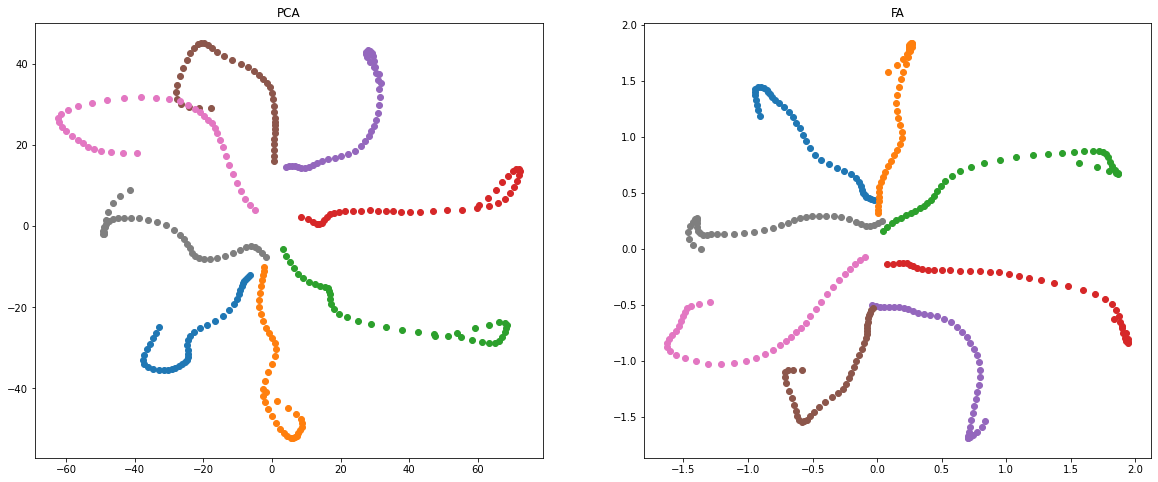

In [22]:
fig, ax = plt.subplots(figsize = (20, 8), ncols = 2)

for dir_pca in av_per_dir["both_pca"]:
    ax[0].scatter(*dir_pca[:, :2].T)
    
for dir_fa in av_per_dir["both_fa"]:
    ax[1].scatter(*dir_fa[:, :2].T)
    
ax[0].set_title('PCA')
ax[1].set_title('FA')

# Decode hand velocities from neural data using linear regression

In [23]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score, KFold

In [24]:
for input_field in ["M1_rates", "PMd_rates", "both_rates", "both_pca"]:
    X = concat_trials(move_td, input_field)
    y = concat_trials(move_td, "vel")

    cv_scores = cross_val_score(LinearRegression(), X, y, cv = KFold(5, shuffle=True))
    
    print(f"{input_field}:\t{cv_scores.mean()}")

M1_rates:	0.7958037599526728
PMd_rates:	0.7816888437237783
both_rates:	0.8736722806002012
both_pca:	0.8369492816707991
